In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Generate a random dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
Y_xor = np.where(Y_xor, 1, -1)

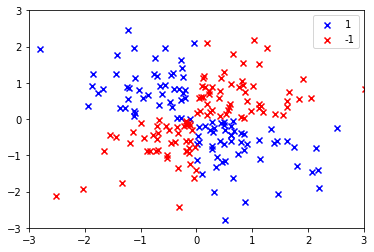

In [105]:
# Plot raw data
plt.scatter(X_xor[Y_xor == 1, 0], X_xor[Y_xor == 1, 1], c="b", marker="x", label="1")
plt.scatter(X_xor[Y_xor == -1, 0], X_xor[Y_xor == -1, 1], c="r", marker="x", label="-1")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend(loc='best')
plt.show()

In [103]:
# Plot results
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    edgecolor='black',
                    label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

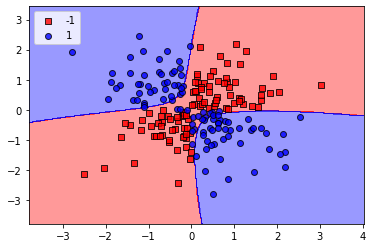

In [115]:
# SVM classifier with gaussian kernel
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, Y_xor)
plot_decision_regions(X_xor, Y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()